#### Get the real data from https://www.kaggle.com/mlg-ulb/creditcardfraud/
creditcard.csv

|                            | fraud accuracy | normal accuracy | accuracy all |   
|----------------------------|----------------|-----------------|--------------|
| Local Outlier Factor (LOF) |     15.30%     |      98.32%     |    98.18%    |
| Isolation Forest           |     37.75%     |      99.83%     |    99.73%    |
| Neural Netowrk             |     **82.04%**     |      **99.96%**     |    **99.93%**    |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print("normal transactions:", len(df[df.Class == 0]))
print("anomalous transactions:", len(df[df.Class == 1]))

normal transactions: 284315
anomalous transactions: 492


In [10]:
inputs = df.drop('Class', axis='columns')
inputs.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [8]:
target = df.Class
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data Exploration

Text(0, 0.5, 'Frequency')

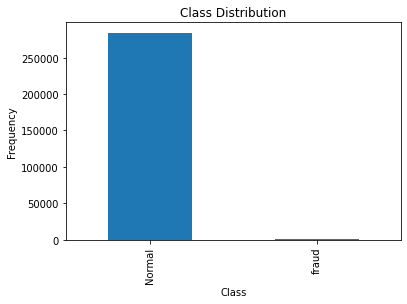

In [15]:
import matplotlib.pyplot as plt
class_count = pd.value_counts(df.Class, sort=True)
class_count.plot(kind='bar')

plt.title("Class Distribution")
plt.xticks([0, 1], ["Normal", "fraud"])
plt.xlabel('Class')
plt.ylabel('Frequency')

In [18]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

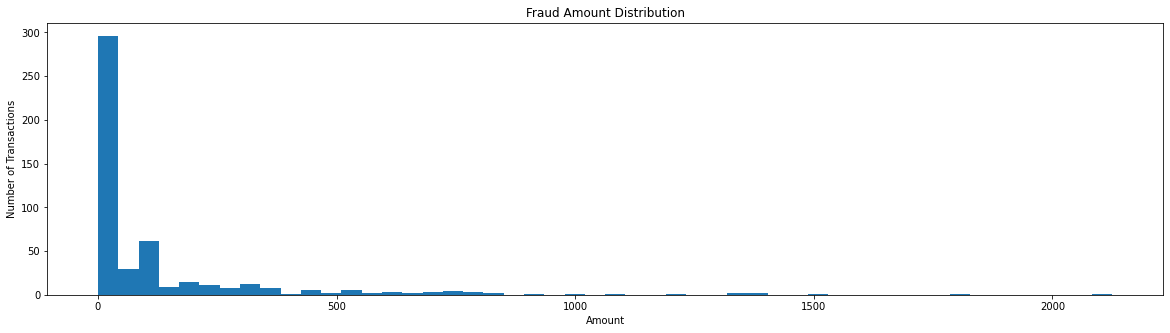

In [30]:
plt.figure(figsize=(20,5))
bins=50
plt.title('Fraud Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.hist(fraud.Amount, bins=bins)
plt.show()

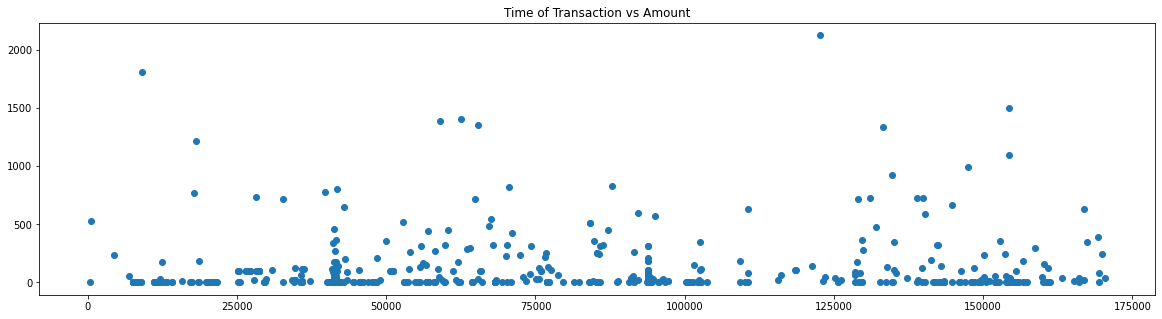

In [29]:
plt.figure(figsize=(20, 5))
plt.title("Time of Transaction vs Amount")
plt.scatter(fraud.Time, fraud.Amount)
plt.show()

In [32]:
print("fraud / all transactions (%): ", len(fraud) / (len(fraud) + len(normal)))

fraud / all transactions (%):  0.001727485630620034


### Create train and test set

In [33]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(inputs, target, test_size=0.2)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(227845, 30) (227845,) (56962, 30) (56962,)


In [37]:
print("number of fraud in the train set: ", len(train_Y[train_Y == 1]))
print("number of fraud in the test set: ", len(test_Y[test_Y == 1]))

number of fraud in the train set:  392
number of fraud in the test set:  100


### Support vector machine:

In [38]:
from sklearn.svm import OneClassSVM

### Local Outlier Factor (LOF) Algorithm:

In [44]:
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors=20, metric='minkowski', algorithm='auto', leaf_size=20)
y_pred = lof_model.fit_predict(train_X)
print(y_pred.shape)
print("prediction :", y_pred[:10])
print("real : ", train_Y[:10])

(227845,)
prediction : [1 1 1 1 1 1 1 1 1 1]
real :  59791     0
262991    0
78599     0
194478    0
57955     0
191350    0
249488    0
190919    0
254580    0
137100    0
Name: Class, dtype: int64


In [45]:
print(np.unique(y_pred))
print(np.unique(np.array(train_Y)))

[-1  1]
[0 1]


In [46]:
y_pred_ = [0 if i == 1 else 1 for i in y_pred]
print(np.unique(y_pred_))

[0 1]


In [55]:
y_true = np.array(train_Y)
true_pred = np.sum(y_true == y_pred_)
print(true_pred)

223712


In [71]:
temp = np.array([2 if c == 0 else 1 for c in y_true])
true_pred_fraud = np.sum(y_pred_ == temp)
print("accuracy fraud: {}%".format((true_pred_fraud / len(y_true[y_true == 1]))*100))

accuracy fraud: 15.306122448979592%


In [72]:
temp_ = np.array([2 if c == 1 else 0 for c in y_true])
true_pred_normal = np.sum(y_pred_ == temp_)
print("accuracy normal: {}%".format((true_pred_normal / len(y_true[y_true == 0]))*100))

accuracy normal: 98.32888552799919%


In [74]:
print("accuracy overall: {}%".format((true_pred / len(y_pred_)*100)))

accuracy overall: 98.18604753231364%


### Isolation Forest Algorithm:

In [78]:
from sklearn.ensemble import IsolationForest
if_model = IsolationForest(n_estimators=100, max_samples=len(train_X), contamination='auto',
                           random_state=123, verbose=1)

In [79]:
if_model.fit(train_X)
y_pred_if = if_model.predict(train_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s finished


In [92]:
print(np.unique(y_true))
print(np.unique(y_pred_if))

[0 1]
[-1  1]


In [88]:
y_pred_if_ = [0 if i == 1 else 1 for i in y_pred_if]
print(np.unique(y_pred_if_))

[0 1]


In [93]:
print(np.unique(y_true))
print(np.unique(y_pred_if_))

[0 1]
[0 1]


In [94]:
true_pred_if = np.sum(y_true == y_pred_if_)
print(true_pred_if)

227233


In [95]:
temp = np.array([2 if c == 0 else 1 for c in y_true])
true_pred_fraud = np.sum(y_pred_if_ == temp)
print("accuracy fraud: {}%".format((true_pred_fraud / len(y_true[y_true == 1]))*100))

accuracy fraud: 37.755102040816325%


In [96]:
temp_ = np.array([2 if c == 1 else 0 for c in y_true])
true_pred_normal = np.sum(y_pred_if_ == temp_)
print("accuracy normal: {}%".format((true_pred_normal / len(y_true[y_true == 0]))*100))

accuracy normal: 99.83820833315015%


In [97]:
print("accuracy overall: {}%".format((true_pred_if / len(y_pred_if)*100)))

accuracy overall: 99.7313963440058%


### Neural Networks:

In [100]:
inputs.Amount.describe()
inputs.V1.describe()

count    2.848070e+05
mean     1.165980e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64

#### Normalise the data [0, 1]

In [111]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

inputs_val = inputs.values
#print(inputs_val.shape)
inputs_sc = min_max_scaler.fit_transform(inputs_val)
column_names = []
for name in inputs.columns:
    column_names.append(name)
#print(column_names)
inputs_scaled = pd.DataFrame(inputs_sc, columns=column_names)

In [112]:
inputs_scaled.Amount.describe()
#inputs_scaled.V1.describe()

count    284807.000000
mean          0.003439
std           0.009736
min           0.000000
25%           0.000218
50%           0.000856
75%           0.003004
max           1.000000
Name: Amount, dtype: float64

In [113]:
values = inputs_scaled.values
print("all data : ", values.shape)
X, test_X, Y, test_Y = train_test_split(values, target, test_size=0.2)
print("train set: {}, target train set: {}".format(X.shape, Y.shape))
print("test set: {}, target test set: {}".format(test_X.shape, test_Y.shape))

all data :  (284807, 30)
train set: (227845, 30), target train set: (227845,)
test set: (56962, 30), target test set: (56962,)


In [132]:
print("TRAIN SET:")
counts_normal = len(Y[Y == 0])
counts_fraud = len(Y[Y == 1])
print(
    "Number of normal samples in training data: {} ({:.2f}% of total)".format(
        counts_fraud, 100 * float(counts_fraud) / len(Y)
    )
)

weight_for_0 = 1.0 / counts_normal
weight_for_1 = 1.0 / counts_fraud

print("TEST SET:")
counts_normal = len(test_Y[test_Y == 0])
counts_fraud = len(test_Y[test_Y == 1])
print(
    "Number of normal samples in training data: {} ({:.2f}% of total)".format(
        counts_fraud, 100 * float(counts_fraud) / len(test_Y)
    )
)

TRAIN SET:
Number of normal samples in training data: 401 (0.18% of total)
TEST SET:
Number of normal samples in training data: 91 (0.16% of total)


In [133]:
print(weight_for_0)
print(weight_for_1)

4.396686656935333e-06
0.0024937655860349127


### Build the model:

In [144]:
from tensorflow import keras

model = keras.Sequential(
[
    keras.layers.Dense(256, activation='relu', input_shape=(X.shape[-1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
________________________________________________

In [145]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

class_weight = {0: 1.0, 1: 1.0}

history = model.fit(
                    X,
                    Y,
                    batch_size=1024,
                    epochs=30,
                    verbose=1,
                    validation_data=(test_X, test_Y),
                    class_weight=class_weight,
                    )


Epoch 1/30
223/223 [==============================] - 5s 23ms/step - loss: 0.0146 - fn: 302.0000 - fp: 544.0000 - tn: 226900.0000 - tp: 99.0000 - precision: 0.1540 - recall: 0.2469 - val_loss: 0.0048 - val_fn: 39.0000 - val_fp: 9.0000 - val_tn: 56862.0000 - val_tp: 52.0000 - val_precision: 0.8525 - val_recall: 0.5714
Epoch 2/30
223/223 [==============================] - 5s 23ms/step - loss: 0.0047 - fn: 140.0000 - fp: 50.0000 - tn: 227394.0000 - tp: 261.0000 - precision: 0.8392 - recall: 0.6509 - val_loss: 0.0073 - val_fn: 44.0000 - val_fp: 8.0000 - val_tn: 56863.0000 - val_tp: 47.0000 - val_precision: 0.8545 - val_recall: 0.5165
Epoch 3/30
223/223 [==============================] - 5s 21ms/step - loss: 0.0043 - fn: 111.0000 - fp: 54.0000 - tn: 227390.0000 - tp: 290.0000 - precision: 0.8430 - recall: 0.7232 - val_loss: 0.0043 - val_fn: 25.0000 - val_fp: 12.0000 - val_tn: 56859.0000 - val_tp: 66.0000 - val_precision: 0.8462 - val_recall: 0.7253
Epoch 4/30
223/223 [======================

Epoch 27/30
223/223 [==============================] - 5s 22ms/step - loss: 0.0037 - fn: 85.0000 - fp: 49.0000 - tn: 227395.0000 - tp: 316.0000 - precision: 0.8658 - recall: 0.7880 - val_loss: 0.0036 - val_fn: 23.0000 - val_fp: 10.0000 - val_tn: 56861.0000 - val_tp: 68.0000 - val_precision: 0.8718 - val_recall: 0.7473
Epoch 28/30
223/223 [==============================] - 5s 21ms/step - loss: 0.0038 - fn: 104.0000 - fp: 52.0000 - tn: 227392.0000 - tp: 297.0000 - precision: 0.8510 - recall: 0.7406 - val_loss: 0.0039 - val_fn: 21.0000 - val_fp: 17.0000 - val_tn: 56854.0000 - val_tp: 70.0000 - val_precision: 0.8046 - val_recall: 0.7692
Epoch 29/30
223/223 [==============================] - 5s 21ms/step - loss: 0.0041 - fn: 103.0000 - fp: 69.0000 - tn: 227375.0000 - tp: 298.0000 - precision: 0.8120 - recall: 0.7431 - val_loss: 0.0034 - val_fn: 22.0000 - val_fp: 12.0000 - val_tn: 56859.0000 - val_tp: 69.0000 - val_precision: 0.8519 - val_recall: 0.7582
Epoch 30/30
223/223 [=================

Text(0, 0.5, 'values')

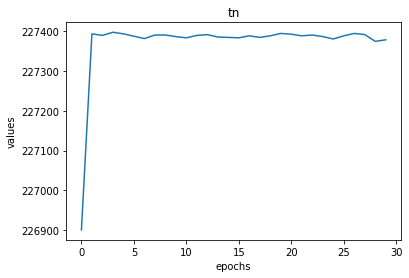

In [151]:
metric = 'tn'
plt.plot(history.history[metric])
plt.title(metric)
plt.xlabel('epochs')
plt.ylabel('values')

#### Train set prediciton:

In [181]:
y_pred = model.predict(X)

In [182]:
y_pred_int = np.around(y_pred.reshape(-1)).astype(int)
print(len(y_pred_int[y_pred_int == 0]))
print(len(y_pred_int[y_pred_int == 1]))

227444
401


In [183]:
temp = np.array([2 if c == 0 else 1 for c in Y])
true_pred_fraud = np.sum(y_pred_int == temp)
print("accuracy fraud: {}%".format((true_pred_fraud / len(Y[Y == 1]))*100))

accuracy fraud: 82.04488778054862%


In [184]:
temp_ = np.array([2 if c == 1 else 0 for c in Y])
true_pred_normal = np.sum(y_pred_int == temp_)
print("accuracy normal: {}%".format((true_pred_normal / len(Y[Y == 0]))*100))

accuracy normal: 99.96834385607006%


In [185]:
print("accuracy overall: {}%".format((np.sum(y_pred_int == Y) / len(Y)*100)))

accuracy overall: 99.93679913976607%


#### Test set prediction:

In [186]:
y_pred = model.predict(test_X)

In [187]:
print(y_pred.shape)

(56962, 1)


In [188]:
y_pred_int = np.around(y_pred.reshape(-1)).astype(int)
print(len(y_pred_int[y_pred_int == 0]))
print(len(y_pred_int[y_pred_int == 1]))

56875
87


In [189]:
temp = np.array([2 if c == 0 else 1 for c in test_Y])
true_pred_fraud = np.sum(y_pred_int == temp)
print("accuracy fraud: {}%".format((true_pred_fraud / len(test_Y[test_Y == 1]))*100))

accuracy fraud: 76.92307692307693%


In [190]:
temp_ = np.array([2 if c == 1 else 0 for c in test_Y])
true_pred_normal = np.sum(y_pred_int == temp_)
print("accuracy normal: {}%".format((true_pred_normal / len(test_Y[test_Y == 0]))*100))

accuracy normal: 99.97010778780046%


In [191]:
print("accuracy overall: {}%".format((np.sum(y_pred_int == test_Y) / len(test_Y)*100)))

accuracy overall: 99.93328885923948%
